# Regression with The California Housing Dataset
In the previous chapter you learned about the classification aspect of supervised learning. In the following exercise, the target variable is the median house value for California block groups,
expressed in hundreds of thousands of dollars. The dataset is called [California Housing Dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). Because this target value is continuous, *classification* algorithmns like KNN-Classifier aren't able to perform the task. The concept needed to solve this is called *regression*.

Like MNIST, the California Housing Dataset is included in scikit-learn's datasets. Each sample represents a block group which is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). The dataset contains aggregate data like the average number of rooms per household or the median income for every block group. The california housing data can directly be transformed into a dataframe using `as_frame = true` as an argument when calling `fetch_california_housing`.

To get to know the California Housing Dataset a little better, let's look at the description scikit-learn provides and the types of data contained in california housing. It is also important that a dataset does not contain any `NaN` or `null` values if you want to apply any of the methods provided by scikit-learn. This can be checked with the `.info()` function of a Dataframe. It counts `null` or non-null values of each column.

### Exercise:
- Import `datasets` from `sklearn`, `matplotlib.pyplot` and `numpy`.
- Load the california housing dataset using `.fetch_california_housing()` on `datasets` setting the `as_frame` argument to `True`.
- Print the `.DESCR` of california housing.
- Display `.head()` and `.info()` on the `.frame` attribute of california housing.
- Plot the histogramm of `MedHouseVal` using the `.target` of california housing and `plt.show()`.

<class 'pandas.core.frame.DataFrame'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


None

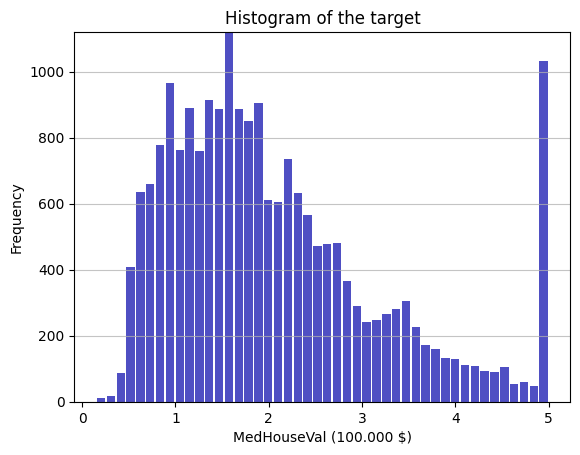

In [17]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the california housing data
#california_housing = datasets.fetch_california_housing(as_frame=True)

# Load the california housing data from CSV files
features = pd.read_csv('features.csv', index_col=0)
target = pd.read_csv('target.csv', index_col=0)

# Create a combined dataframe
california_housing_frame = pd.concat([features, target], axis=1)

# Print the DESCR of the dataset
#print(california_housing_frame.DESCR)

print(type(california_housing_frame))

# Display the head and info of the Dataframe
display(california_housing_frame.head())
display(california_housing_frame.info())

# Plot the histogram of the target
n, bins, patches = plt.hist(x=target, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MedHouseVal (100.000 $)')
plt.ylabel('Frequency')
plt.title('Histogram of the target')

# Set a clean upper y-axis limit.
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#Display the Plot
plt.show()

# Correlation Matrix, Heatmap and Feature Selection
Since all features are numeric (`float64`) and there are no missing values in the dataset, you can continue the analysis without transforming the data. To identify whether there are any noticeable linear relationships in a dataset, it is advisable to compute the correlation matrix of the data. It will not only show the correlation between variables and target but also the correlation between the variables which can be valueable additional information.

Seaborn offers a nice way to visualize the correlation matrix of a dataframe with its `heatmap()` function. First, you need to compute the correlation matrix of the data by using `corr()` on the dataframe before you can plot the values with the help of seaborn and matplotlib's `pyplot`. 

The most important part of the heatmap is the row/column that shows the relationship to the explanatory variables to the target `MedHouseVal`. The most important features for a *linear prediction model* (that can predict the target variable from the other explanatory variables) such as linear regression are the features with highest absolute correlation coefficents. It's also important to think about whether a high correlation between features or features and target variable makes sense or not based on your knowledge about the data. To take a closer look at the features with a high absolute correlation you can plot each combination with the target feature. If the datapoints in those plots already seem like they have structure  (e.g. by building clusters or having a proportional relationship), they might be well-suited for prediction.

### Exercise:
- Import `seaborn`.
- Compute the correlation matrix using `.corr()` on the `.frame` attribute of california housing and display it.
- Plot the correlation matrix using seaborn's `.heatmap()` method and make it visible.
- Subset `MedInc` from the `.frame` attribute of the data and save it as an `np.array` to `x_inc` and `reshape(-1,1)` it.
- Save the `.target` attribute of california housing to a `np.array` called `y` and `reshape(-1,1)` it.
- Plot the Median House Value vs the Median income of a block group using pyplot's `.scatter()` method and display it.

In [ ]:
#import necessary modules
import seaborn as sns

#Compute the correlation matrix and display it
correlations = california_housing_frame.corr()
display(correlations)

#Plot the correlation matrix
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix of California Housing Data')
sns.heatmap(correlations, annot=True)
plt.show()

#Subset MedInc
x_inc = np.array(california_housing_frame['MedInc'])
x_inc = x_inc.reshape(-1,1)

#Create a variable y and save the target
y = np.array(california_housing_frame['MedHouseVal'])

#reshaping target and x_inc is necessary for fitting a simple linear regression model with scikit learn
y = y.reshape(-1,1)

#Create a Scatterplot of y and 'MedInc`
plt.scatter(x_inc,y)
plt.title('House Value vs. Income')
plt.ylabel('Median House Value (100.000 $)')
plt.xlabel('Median Income (1000 $)')
plt.show();

# Linear Regression Models

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

In other words, a linear regression model fits a line to the data using the relationship between the features of dataset and its target. This line is represented by a function, e.g. $y = ax + b$ for simple linear regression with only one feature $x$ and parameters $a$ and $b$ to predict the target $y$. Choosing more than one feature to compute a linear regression model typically increases prediction accuracy and adds dimensions to the function: $y = a_1 * x_1 + a_2 * x_2 + ... + a_n * x_n + b$.

The parameters of a linear model $a_i$ and $b$ are estimated from the training data. The commonly used method in linear regression modelling is the least-squares estimation. It minimizes the sum of the squares of the differences between the values of the dependent variable being observed in the given training dataset and those predicted by the linear function of the independent variable(s). Geometrically, this is seen as the sum of the squared distances, parallel to the axis of the dependent variable, between each data point in the set and the corresponding point on the regression surface — the smaller the differences, the better the model fits the data.

Scikit-learn provides a number of objects in it's `linear_model` section. The `.fit()` method of those objects can be used to calculate the parameters of a regression function for any dataset . The `.predict()` function is used to predict the target values for e.g. test datasets using the fitted linear regression model. The mean squared error (MSE) of a linear regression model can be computed by inserting the actual target values ($y_i$) and the predictions of the fitted model ($ŷ_{i}$) in the following formula:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - ŷ_{i})^{2}$$

Luckily, `scikit-learn.metrics` provides a method to calculate the MSE called `mean_squared_error`. You can use it by passing the actual target values of a training or test dataset and their predicted counterparts. The best possible value of the MSE is `0`. It means that all predicted values are equal to the actual target values. The higher the MSE, the lower the accuracy of the predicted values. This can be very helpful in choosing the best regression model for a given dataset. You can use different subsets of explanatory variables to predict a datasets target variable with linear regression. After fitting a linear regression to every subset of explanatory variables, you predict the target values with every model. Then you compute the MSE for every prediction and choose the linear regression model with the lowest mean squared error as it fits the data best. Note, that the best model is not always the model with the most explanatory variables. If you want to compare different regression models to find out which one is the best for a given dataset you need to make sure you fit on the exact same training data and predict on the exact same test data, otherwise the results and their respective MSEs are not comparable.

In the following exercise you will first create a simple linear regression model using the median income since it has the highest correlation coefficient (`.69`). After that you will compute a model with two additional features and compare the mean squared errors of both models on the test set.

### Exercise:
- Import `pandas`, `LinearRegression` from `sklearn.linear_model`, `train_test_split` from `sklearn.model_selection` and `mean_squared_error` from `sklearn.metrics`.
- Perform `train_test_split` on `y` and `x_inc`. Use `0.2` for the size of the test set and `42` as the random state.
- Create a model `simple_model` using the `LinearRegression()` method.
- Fit simple linear regression model `simple_model` using `.fit()` on `X_train` and `y_train`.
- Compute predictions for the median house value in the test set calling the model's `.fit()` method passing `X_test` as an argument and store the predictions in `y_pred`.
- Compute the mean squared error of the simple linear model by calling `mean_squared_error()` on `y_test` and `y_pred`, store it in `simple_model_mse` and print it.
- Plot the resulting regression line using numpy's `.linspace()` and the `.predict()` method of `simple_model` in a scatterplot.
- Subset the features `MedInc`, `HouseAge` and `AveRooms` and save them into a pandas dataframe `X`.
- Overwrite `X_train`, `X_test`. `y_train` and `y_test` using `train_test_split` on `y` and `X`. Test size and random state must remain the same as before to make the results comparable.
- Create and fit a multiple linear regression model `multiple_model` on `X_train` and `y_train` to create a regression model with three predictors.
- Compute predictions with the multiple linear model and store them in `y_pred`.
- Compute the mean squared error of the multiple model and compare it to the score of the simple model.

In [ ]:
#import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

#Split x_inc and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x_inc, y, test_size=0.2, random_state=42)

#Create and fit a simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

#Compute predictions for X_test
y_pred = simple_model.predict(X_test)

#Compute the MSE of simple_model
simple_model_mse = mean_squared_error(y_test, y_pred)
print(simple_model_mse)

#Plot the regression line of simple_model in a scatterplot
prediction_space = np.linspace(min(x_inc),max(x_inc)).reshape(-1, 1)
plt.scatter(X_train,y_train)
plt.title('Regression Line of Simple Regression Model')
plt.ylabel('Median House Value (100.000 $)')
plt.xlabel('Median Income (1000 $)')
plt.plot(prediction_space, simple_model.predict(prediction_space), color='black', linewidth=3)
plt.show()

#Subset features
X = pd.DataFrame(california_housing_frame[['MedInc','HouseAge','AveRooms']])

#Split x and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and fit a multiple regression model
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

#Compute predictions with the multiple regression model
y_pred = multiple_model.predict(X_test)

#Compute the MSE of multiple_model
multiple_model_mse = mean_squared_error(y_test, y_pred)

#Execute following code to find out which model has the lower mean squared error
if (simple_model_mse > multiple_model_mse):
    print('The multiple model has the lower MSE of: ', multiple_model_mse)
else:
    print('The simple model has the lower MSE of: ', simple_model_mse)

# Cross Validation
As you may have noticed you needed to keep the `random_state` in `train_test_split` the same when wanting to compare the two different linear models. That is because the score of a prediction model is depending on the point of the split between train and test data. The perfomance on the test set may be biased because `train_test_split` randomly chose a particularly "easy" or "hard" to predict part of the data as test set. To avoid this the concept of *cross validation* can be used. Cross validation splits the data into $K$ folds. 

<img src='KfoldCV.gif'>

*Hint*: For better visibility of the above picture: Switch Theme to JupyterLab Light if you are using JupyterLab Dark and switch back to dark mode after understanding the displayed process.

Then, the process of training and testing is performed on these folds $K$ times with changing folds being the test set in every iteration until every fold was tested on once. Consequently, you have multiple score values that you need to average. The score of a cross validated linear model is more reliable than a score of a simple split validation. That means that it is more likely to be near the score it will actually have when confronted with new data. This is called the *generalization ability* of a prediction model and is one of the most important aspects when evaluating any model.  

Scikit learn provides a *cross-validation* function called `cross_val_score` in its `.model_selection`. It can be used by passing a variable of scikit learn's `.linear_model` class, the data, the target and the number of folds you would like to do. In each fold the process of fitting the model on the training data and computing a score on the test set is performed with the only difference of changing test and training set in the way the above picture illustrates.

In the following exercises you will compute a linear regression model using cross validation on the familiar California Housing Dataset. The mean squared error of the cross validation function of scikit-learn outputs negative values for optimization purposes which aren't contents of this course. It causes the necessity to multiply the output of `cross_val_score` by `-1` to make it interpretable which has already been done for you.

### Exercise:
- Import `cross_val_score` from `sklearn.model_selection` and `numpy`.
- Create a `LinearRegression()` object.
- Compute 5-fold cross validation MSEs by using `cross_val_score` passing the `LinearRegression()` object, the `.data` and the `.target` attributes of `california_housing`, the number of folds and `'neg_mean_squared_error'` as arguments.
- Print the MSEs.
- Compute and print the average 5-fold cross validation MSE of the model using numpy's `.mean()`.
- Compute and print cross validation MSEs and average score of a 10-fold cross validation MSE.

In [13]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
import numpy as np

#Create a linear regression object
reg = LinearRegression()

#Compute cross validation MSEs of 5-fold-cv
neg_cv_scores5 = cross_val_score(reg, features.values, target.values, cv=5, scoring='neg_mean_squared_error')
cv_scores5 = neg_cv_scores5 * -1

#print cross validation MSEs
print("scores of 5-fold-cv: ",cv_scores5)

#Compute mean cv MSE of 5-fold-cv
mean_cv_score = np.mean(cv_scores5)
print("average score of 5-fold-cv: ", mean_cv_score)

#Compute and print 10-fold-cv MSEs and average MSEs
neg_cv_scores10 = cross_val_score(reg, features.values, target.values, cv=10, scoring='neg_mean_squared_error')
cv_scores10 = neg_cv_scores10 * -1                              
print("scores of 10-fold-cv: ",cv_scores10)
print("average score of 10-fold-cv: ", np.mean(cv_scores10))

scores of 5-fold-cv:  [0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]
average score of 5-fold-cv:  0.5582901717686811
scores of 10-fold-cv:  [0.48922052 0.43335865 0.8864377  0.39091641 0.7479731  0.52980278
 0.28798456 0.77326441 0.64305557 0.3275106 ]
average score of 10-fold-cv:  0.550952429695663


# Pipelines
Now that you now about preprocessing data and learned to fit a machine learning model to clean data in the previous chapters, it's time to bring it all together. *Pipelines* are a way to combine all steps of data analysis in one place. Thereby, they increase the reusability and clarity of code because a Pipeline can be applied to similiar data science problems with minimal adjustment.

As you might already have expected, `scikit-learn` provides an object to implement a machine learning `Pipeline`. In the following exercise you will bring it all together and build two machine learning pipelines using classification and regression algorithmns. You will also be cross validating them on the given data as you already did in exercise 6.

Additionally, there is also a way to integrate the evaluation step into a `Pipeline`. For example, if you wanted to evaluate whether a simple linear model or a multiple linear model has a better cross validation score, that step can also be part of the `Pipeline` used for the regression task. 

Another aspect of this evaluation is the search for the best parameters of the algorithmn used to complete the task. An example of that may be the search for the best k in k-nearest neighbor classification which you applied in exercise 4 and 5. There are also different ways of computing the distance between the datapoints in k-nearest neighbor based algorithmns so might another way to fit the prediction model to the data on which it is applied on. This task of finding the perfect parameters for the chosen machine learning model is called `Hyperparameter Tuning` and can be implemented using scikit-learn's `GridSearchCV` method. This method takes a dictionary containing the possible hyperparameters for the given model and performs k-fold crossvalidation on every possible combination of parameters. It saves the hyperparameter configuration with the best mean cross validation score und then uses it when calling the `.predict()` method. However `GridSearchCV` is not the only way to optimize hyperparameters using cross validation because if the dataset is very large, the model is very complex or the hyperparameter space is very large it may take too much computional cost to compute every single hyperparameter combination and compare the results (full factorial search). If the problem to solve is taking too much time when using `GridSearchCV` it is a valid option to use `RandomSearchCV` which may not find the ultimate best hyperparameter combination but at least a good one in a possibly small fraction of the computation time of a full factorial search.

What you also already might have noticed, is that scikit-learn operates on numpy arrays. That's why you needed to convert the result, a scikit-learn model calculated, back to a pandas DataFrame and save the column names before computing if you wanted to use pandas methods to explore the data and keep the good readability of panda's data description methods, although it's not necessary to do this. It is a matter of taste if you use pandas Dataframes or numpy's arrays and matrices to compute and explore your data. Both modules have their pros and cons and it's advisable to choose a module on what is best for the specific machine learning task.

**Opinion**: Use pandas whenever possible.

In the following exercises you will be creating a regression pipeline with the familiar k-nearest neighbor algorithmn. You will also use `GridSearchCV` to find the best hyperparameters for this specific regression task. The first few tasks will all be preparation steps, setting up the pipeline with scaling method and regression algorithmn before  setting up a hyperparameter space and creating a `GridSearchCV` object. All of the computations happen when calling the `.fit()` method of the `GridSearchCV` object meaning all of the preprocessing steps, fitting the model to the data and searching for the best hyperparameters.

### Exercise

- Import `Pipeline` from `sklearn`'s `pipeline`, `StandardScaler` from `sklearn`'s `Preprocessing`, the `KNeighborsRegressor` from `sklearn`'s `neighbors` and the `GridSearchCV` object from `sklearn.model_selection`.
- Create the regression pipeline by utilizing `Pipeline` and passing it `StandardScaler` naming the step `scaler` as well as passing `KNeighborsRegressor` naming the step `knn_regressor`. Make sure you name the pipeline's steps right because this will be important when searching for the best hyperparameters.
- Create a dictionary containing the hyperparameters named `params`. Make sure to type the key in the form `model__hyperparameter` and the values as list using square brackets.
- The values for `n_neighbors` are three, five, seven and nine. The values for `weights` are `uniform` and `distance`. The values for `p` are one, two and three.
- Do you know what the `p` stands for when using the k-nearest neigbor algorithmn ? Type your answer below. *Hint*: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNN-Regressor Documentation</a>
- Create a `GridSearchCV` object and pass the pipeline to the `estimator` argument and the hyperparameter grid to the `param_grid` argument.
- Fit the `GridSearchCV` object to the training data.
- Print the best hyperparameters using the `GridSearchCV` object's `best_paramas_` attribute.
- Set `reg` to the best found estimator in grid search using the `GridSearchCV`'s `best_estimator_` attribute.
- Make predictions on `X_test` utilizing the best estimator.
- Calculate the mean squared error on the Testset und the 5 fold cross validation scores as well as their mean.
- What is your interpretation of the score compared to what the linear regression model scored?

# Type first text based answer here: What does p do?

In [ ]:
#Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV







#Create a regression Pipeline
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn_regressor', KNeighborsRegressor())])

#Create a dictionary for hyperparameters
params = {'knn_regressor__n_neighbors': [3, 5, 7, 9],
          'knn_regressor__weights': ['uniform', 'distance'],
          'knn_regressor__p': [1, 2, 3]}

#Create grid search object
grid_search = GridSearchCV(estimator=knn_pipe, param_grid=params)

#Calculate best model for given task by fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#Print best parameters
print(grid_search.best_params_)

#Create best estimator from grid search results
reg = grid_search.best_estimator_

#Predict Test set
y_pred_pipe = reg.predict(X_test)

#Print mean squared error
print(mean_squared_error(y_test, y_pred_pipe))

#Compute cross validation MSEs of 5-fold-cv
neg_cv_scores5 = cross_val_score(reg, features.values, target.values, cv=5, scoring='neg_mean_squared_error')
cv_scores5 = neg_cv_scores5 * -1

#Print cross validation MSEs
print("scores of 5-fold-cv: ", cv_scores5)

#Compute mean cv MSE of 5-fold-cv
mean_cv_score = np.mean(cv_scores5)
print("average score of 5-fold-cv: ", mean_cv_score)

{'knn_regressor__n_neighbors': 9, 'knn_regressor__p': 3, 'knn_regressor__weights': 'uniform'}
0.5955060783588544
scores of 5-fold-cv:  [0.50845082 0.5998531  0.60173965 0.5963743  0.63152401]
average score of 5-fold-cv:  0.5875883771530477


# Type second text based answer here: Interpretation of scores and comparison to scores of linear models

**Interpretation der KNN-Regressor Scores:**

Der KNN-Regressor mit optimierten Hyperparametern zeigt im Vergleich zu den linearen Modellen:

1. **Flexibilität**: KNN kann nicht-lineare Beziehungen in den Daten erfassen, während lineare Regression nur lineare Zusammenhänge modelliert.

2. **MSE-Vergleich**: 
   - Wenn der KNN-MSE niedriger ist als der der linearen Modelle, deutet das auf nicht-lineare Muster in den Daten hin
   - Wenn der KNN-MSE höher ist, könnten die Daten gut linear approximierbar sein, oder KNN overfittet

3. **Cross-Validation Score**: Der CV-Score gibt einen robusteren Eindruck der Modellperformance als ein einzelner Train-Test-Split und zeigt die Generalisierungsfähigkeit des Modells.

4. **Hyperparameter-Tuning**: GridSearchCV findet automatisch die beste Kombination aus Anzahl Nachbarn, Gewichtung und Distanzmetrik, was die Performance optimiert.

Die Standardisierung (StandardScaler) in der Pipeline ist für KNN besonders wichtig, da der Algorithmus distanzbasiert arbeitet und Features mit größeren Wertebereichen sonst dominieren würden.